# [Deep Learning for Vision Systems](https://www.manning.com/books/deep-learning-for-vision-systems?a_aid=compvisionbookcom&a_bid=90abff15) Book


## LeNet implementation with Keras and MNIST dataset

---

In this notebook, we train a Convolutional Neural Network to classify images from the MNIST database.

### 1. Load MNIST Database

MNIST is one of the most famous datasets in the field of machine learning.
 - It has 70,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

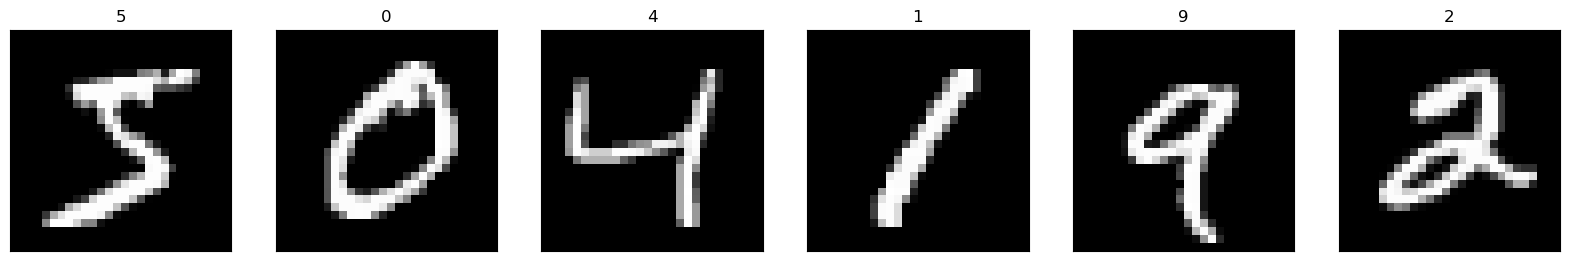

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

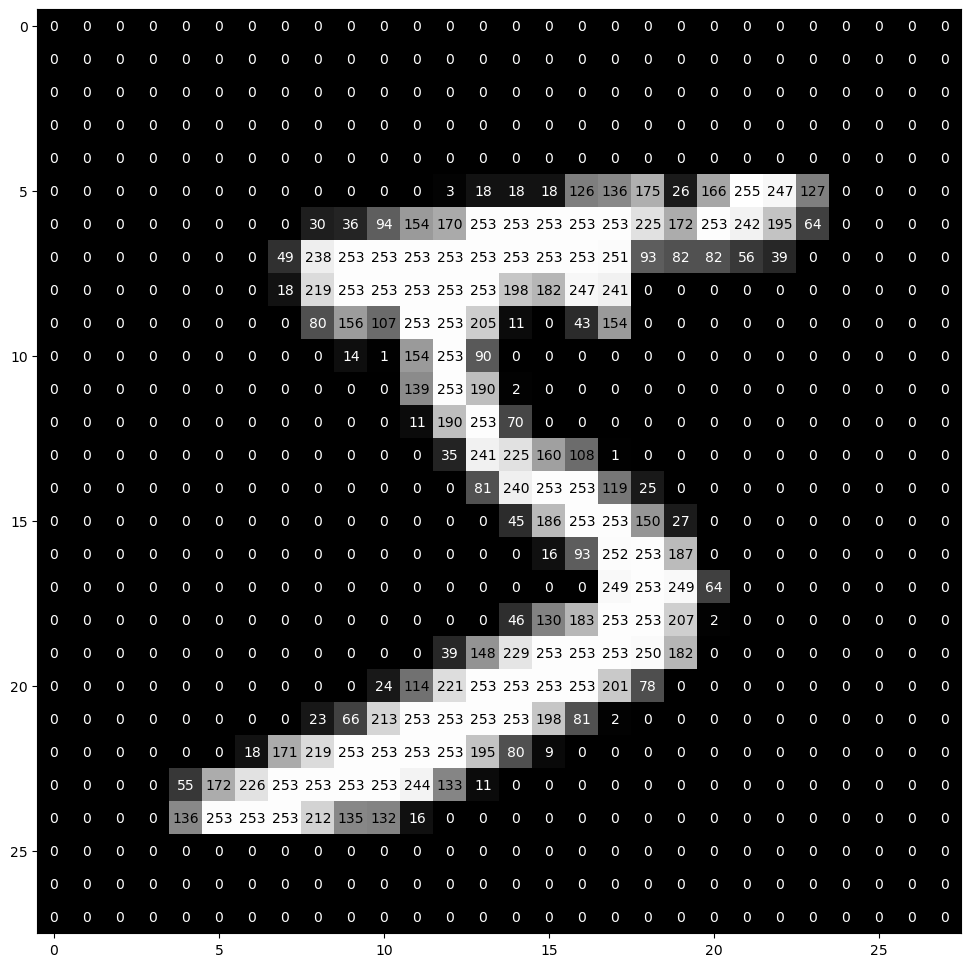

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# normalize the data to accelerate learning
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 5. Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [5]:
from keras import utils


num_classes = 10
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
# input image dimensions 28x28 pixel images.
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', X_train.shape)

image input shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


### 6. Reshape data to fit our CNN (and input_shape)

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
import tensorflow as tf

def resize_and_expand_images(images):
    # 이미지 크기 조정
    images_resized = tf.image.resize(images, [227, 227])

    # 채널을 3으로 확장 (흑백 이미지를 RGB로 변환)
    images_expanded = tf.repeat(images_resized, 3, axis=-1)

    return images_expanded

# 훈련 및 테스트 데이터에 함수 적용
X_train= resize_and_expand_images(X_train)  # 채널 차원 추가
X_test= resize_and_expand_images(X_test)    # 채널 차원 추가

Metal device set to: Apple M1 Pro


2023-11-17 14:19:03.398538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-17 14:19:03.399218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Shape: Dst tensor is not initialized. [Op:Shape]


## AlexNet implementation with Keras


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense,Activation,MaxPool2D, BatchNormalization, Dropout
from keras.regularizers import l2

In [ ]:
# Instantiate an empty sequential model
model = Sequential(name="Alexnet")
# 1st layer (conv + pool + batchnorm)
model.add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid', kernel_regularizer=l2(0.0005),
input_shape = (227,227,3)))
model.add(Activation('relu'))  #<---- activation function can be added on its own layer or within the Conv2D function
model.add(MaxPool2D(pool_size=(3,3), strides= (2,2), padding='valid'))
model.add(BatchNormalization())

# 2nd layer (conv + pool + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# layer 3 (conv + batchnorm)      <--- note that the authors did not add a POOL layer here
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# layer 4 (conv + batchnorm)      <--- similar to layer 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# layer 5 (conv + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())

# layer 6 (Dense layer + dropout)
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

# layer 7 (Dense layers)
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

# layer 8 (softmax output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# print the model summary
model.summary()
